## Viewing Neutrino Events from a Reconstruction Perspective

written by Isobel Mawby (i.mawby1@lancaster.ac.uk)

In [1]:
#############################
# Python imports
#############################
# Standard python imports
import uproot
import random
import numpy as np
import matplotlib.pyplot as plt
# Creating a responsive 3D plot
from mpl_toolkits.mplot3d import Axes3D
%matplotlib ipympl
from termcolor import colored, cprint

In [2]:
########################################################
# Drawing colours - USER DOESN'T NEED TO ADD ANYTHING
########################################################

pdgColours_graph = {13 : 'blue', 11 : 'red', 2212 : 'green', 211 : 'pink', 22 : 'tab:orange', 321 : 'tab:brown'}
trackShowerColours_graph = {11 : 'red', 13 : 'blue'}
hierarchyColours_graph = {1 : 'black', 2 : 'red', 3 : 'blue', 4: 'g'}

<div class="alert alert-block alert-success">
   <p style="font-size: 22px;">
    &#8595 Where is the reco2 file in which your events live?
   </p>
</div>

In [3]:
###########################################################
# Add file name - USER MUST DO SOMETHING HERE
###########################################################

# ATTN USER: You need to set the file path!
fileName = '/Users/isobel/Desktop/MicroBooNE/2024/VisualiseSlice/files/reco_stage_2_hist.root'

<div class="alert alert-block alert-danger">
   <p style="font-size: 22px;">
    &#8593 WAIT! Have you set the file path correctly??
   </p>
</div>

In [4]:
##################################################################
# Pull out things from file - USER DOESN'T NEED TO ADD ANYTHING
##################################################################

treeFile = uproot.open(fileName)
tree = treeFile['visualiseSlice/VisualisationTree']
branches = tree.arrays()

# Event level info
event_main = branches['Event']
run_main = branches['Run']
subrun_main = branches['Subrun']
sliceIDs_main = branches['SliceIDs']
trueNuSliceID_main = branches['TrueNuSliceID']
pandoraNuSliceID_main = branches['PandoraNuSliceID']
flashMatchNuSliceID_main = branches['FlashMatchNuSliceID']
sliceCompleteness_main = branches['SliceCompleteness']
slicePurity_main = branches['SlicePurity']
# Event level visualisation
trueNuVertexX_main = branches['TrueNuVertexX']
trueNuVertexY_main = branches['TrueNuVertexY']
trueNuVertexZ_main = branches['TrueNuVertexZ']
uTrueNuVertex_wire_main = branches['UTrueNuVertex_wire']
vTrueNuVertex_wire_main = branches['VTrueNuVertex_wire']
wTrueNuVertex_wire_main = branches['WTrueNuVertex_wire']
topologicalScore_main = branches['TopologicalScore']
recoNuVertexX_main = branches['RecoNuVertexX']
recoNuVertexY_main = branches['RecoNuVertexY']
recoNuVertexZ_main = branches['RecoNuVertexZ']
uRecoNuVertex_wire_main = branches['URecoNuVertex_wire']
vRecoNuVertex_wire_main = branches['VRecoNuVertex_wire']
wRecoNuVertex_wire_main = branches['WRecoNuVertex_wire']
allUHits_wire_main = branches['AllUHits_wire']
allUHits_drift_main = branches['AllUHits_drift']
allUHits_owner_main = branches['AllUHits_owner']
allVHits_wire_main = branches['AllVHits_wire']
allVHits_drift_main = branches['AllVHits_drift']
allVHits_owner_main = branches['AllVHits_owner']
allWHits_wire_main = branches['AllWHits_wire']
allWHits_drift_main = branches['AllWHits_drift']
allWHits_owner_main = branches['AllWHits_owner']
# PFP level info 
truePDG_main = branches['TruePDG']
completeness_main = branches['Completeness']
purity_main = branches['Purity']
generation_main = branches['Generation']
pandoraPFPCode_main = branches['PandoraPFPCode']
# PFP level visualisation
recoVertexX_main = branches['RecoVertexX']
recoVertexY_main = branches['RecoVertexY']
recoVertexZ_main = branches['RecoVertexZ']
uRecoVertex_wire_main = branches['URecoVertex_wire']
uRecoVertex_drift_main = branches['URecoVertex_drift']
vRecoVertex_wire_main = branches['VRecoVertex_wire']
vRecoVertex_drift_main = branches['VRecoVertex_drift']
wRecoVertex_wire_main = branches['WRecoVertex_wire']
wRecoVertex_drift_main = branches['WRecoVertex_drift']
uHits_wire_main = branches['UHits_wire']
uHits_drift_main = branches['UHits_drift']
vHits_wire_main = branches['VHits_wire']
vHits_drift_main = branches['VHits_drift']
wHits_wire_main = branches['WHits_wire']
wHits_drift_main = branches['WHits_drift']
spacePointsX_main = branches['SpacePointsX']
spacePointsY_main = branches['SpacePointsY']
spacePointsZ_main = branches['SpacePointsZ']

<div class="alert alert-block alert-success">
   <p style="font-size: 22px;">
    &#8595 What is the index of the event you want to view? i.e. index 0 == first event in file
   </p>
</div>

In [5]:
#################################################################
# Index of event in file to view - USER MUST DO SOMETHING HERE
#################################################################

# ATTN USER: You need to set the event index number!
iEvent = 2

<div class="alert alert-block alert-danger">
   <p style="font-size: 22px;">
    &#8593 WAIT! Have you set the file path correctly??
   </p>
</div>

In [6]:
print('')
print('Event:', event_main[iEvent])
print('Run:', run_main[iEvent])
print('Subrun:', subrun_main[iEvent])


Event: 1266
Run: 14271
Subrun: 25


<div class="alert alert-block alert-danger">
   <p style="font-size: 22px;">
    &#8593 Is this the run:subrun:event that you were expecting??
   </p>
</div>

<div class="alert alert-block alert-info" style="font-size: 18px;">
    <h1><u>Slicing</u></h1>
    <ul> 
      <li> In the Pandora reconstruction, we group the recob::Hits into 'slices' such that (if done perfectly) each slice contains the recob::Hits of a neutrino hierarchy or single cosmic-ray hierachy.</li>
      <li> Pandora has neutrino and cosmic-ray focused reconstruction chains and the former should be applied to neutrino slices, and the latter cosmic-ray slices. We expect at most neutrino interaction per spill at MicroBooNE, so we search for our neutrino slice and then tag all other slices as cosmic-ray slices.</li>
      <li> Within Pandora, a BDT is used to score each slice on how neutrino-like it is, and the slice with the highest 'topological score' is chosen<b><i> by Pandora </i></b>to be the neutrino slice.</li> 
      <li> As long as a slice exists, Pandora will return a neutrino slice. </li>
      <li> <b><i> This may not be the neutrino slice that your ntuple refers to.</i></b> After Pandora runs a flash-matching tool, which choses the neutrino slice to be that which is most consistent with the beam flash. </li>
      <li> MicroBooNE ntuples, that focus on neutrino interactions, almost always consider the flash-matched slice.
      <li> Sometimes no slice is returned by the flash-matching tool, and so your ntuple will tell you that the neutrino interaction was not reconstructed. </li>
    </ul>
    <br>
    In the analyser I've saved the reconstruction output of the flash-matched neutrino slice, the Pandora neutrino slice and all slices with any true neutrino hits in.
</div>

<div class="alert alert-block alert-success">
   <p style="font-size: 22px;">
    &#8595 Lets see how the slicing has performed...
   </p>
</div>

In [7]:
print('') # Where true is the slices that has the most true neutrino interaction hits
if (len(np.where(sliceIDs_main[iEvent] == trueNuSliceID_main[iEvent])[0]) == 0) :
    print('NO TRUE SLICE FOUND!')
else :
    print('True nu slice index:', np.where(sliceIDs_main[iEvent] == trueNuSliceID_main[iEvent])[0][0])
if (len(np.where(sliceIDs_main[iEvent] == pandoraNuSliceID_main[iEvent])[0]) == 0) :
    print('NO PANDORA SLICE FOUND!')
else :
    print('Pandora slice index:', np.where(sliceIDs_main[iEvent] == pandoraNuSliceID_main[iEvent])[0][0]) 
if (len(np.where(sliceIDs_main[iEvent] == flashMatchNuSliceID_main[iEvent])[0]) == 0) :
    print('Flash match slice index:', 'NO FLASH MATCH SLICE FOUND!')
else :
    print('Flash match slice index:', np.where(sliceIDs_main[iEvent] == flashMatchNuSliceID_main[iEvent])[0][0])
print('')
print('Number of slices saved:', len(sliceIDs_main[iEvent]), 'slice(s)')


True nu slice index: 0
Pandora slice index: 0
Flash match slice index: NO FLASH MATCH SLICE FOUND!

Number of slices saved: 5 slice(s)


<div class="alert alert-block alert-danger">
   <p style="font-size: 22px;">
    &#8593 We may not have a flash matched neutrino slice
   </p>
</div>

In [8]:
######################################################
# Get event arrays - USER DOESN'T NEED TO ADD ANYTHING
######################################################
# Event level info
event_event = event_main[iEvent]
run_event = run_main[iEvent]
subrun_event = subrun_main[iEvent]
sliceIDs_event = sliceIDs_main[iEvent]
trueNuSliceID_event = trueNuSliceID_main[iEvent]
pandoraNuSliceID_event = pandoraNuSliceID_main[iEvent]
flashMatchNuSliceID_event = flashMatchNuSliceID_main[iEvent]
sliceCompleteness_event = sliceCompleteness_main[iEvent]
slicePurity_event = slicePurity_main[iEvent]
# Event level visualisation
trueNuVertexX_event = trueNuVertexX_main[iEvent]
trueNuVertexY_event = trueNuVertexY_main[iEvent]
trueNuVertexZ_event = trueNuVertexZ_main[iEvent]
uTrueNuVertex_wire_event = uTrueNuVertex_wire_main[iEvent]
vTrueNuVertex_wire_event = vTrueNuVertex_wire_main[iEvent]
wTrueNuVertex_wire_event = wTrueNuVertex_wire_main[iEvent]
topologicalScore_event = topologicalScore_main[iEvent]
recoNuVertexX_event = recoNuVertexX_main[iEvent]
recoNuVertexY_event = recoNuVertexY_main[iEvent]
recoNuVertexZ_event = recoNuVertexZ_main[iEvent]
uRecoNuVertex_wire_event = uRecoNuVertex_wire_main[iEvent]
vRecoNuVertex_wire_event = vRecoNuVertex_wire_main[iEvent]
wRecoNuVertex_wire_event = wRecoNuVertex_wire_main[iEvent]
allUHits_wire_event = allUHits_wire_main[iEvent]
allUHits_drift_event = allUHits_drift_main[iEvent]
allUHits_owner_event = allUHits_owner_main[iEvent]
allVHits_wire_event = allVHits_wire_main[iEvent]
allVHits_drift_event = allVHits_drift_main[iEvent]
allVHits_owner_event = allVHits_owner_main[iEvent]
allWHits_wire_event = allWHits_wire_main[iEvent]
allWHits_drift_event = allWHits_drift_main[iEvent]
allWHits_owner_event = allWHits_owner_main[iEvent]
# PFP level info 
truePDG_event = truePDG_main[iEvent]
completeness_event = completeness_main[iEvent]
purity_event = purity_main[iEvent]
generation_event = generation_main[iEvent]
pandoraPFPCode_event = pandoraPFPCode_main[iEvent]
# PFP level visualisation
recoVertexX_event = recoVertexX_main[iEvent]
recoVertexY_event = recoVertexY_main[iEvent]
recoVertexZ_event = recoVertexZ_main[iEvent]
uRecoVertex_wire_event = uRecoVertex_wire_main[iEvent]
uRecoVertex_drift_event = uRecoVertex_drift_main[iEvent]
vRecoVertex_wire_event = vRecoVertex_wire_main[iEvent]
vRecoVertex_drift_event = vRecoVertex_drift_main[iEvent]
wRecoVertex_wire_event = wRecoVertex_wire_main[iEvent]
wRecoVertex_drift_event = wRecoVertex_drift_main[iEvent]
uHits_wire_event = uHits_wire_main[iEvent]
uHits_drift_event = uHits_drift_main[iEvent]
vHits_wire_event = vHits_wire_main[iEvent]
vHits_drift_event = vHits_drift_main[iEvent]
wHits_wire_event = wHits_wire_main[iEvent]
wHits_drift_event = wHits_drift_main[iEvent]
spacePointsX_event = spacePointsX_main[iEvent]
spacePointsY_event = spacePointsY_main[iEvent]
spacePointsZ_event = spacePointsZ_main[iEvent]

In [9]:
############################################################################
# Get wire/drift limits for TRUE plots - USER DOESN'T NEED TO ADD ANYTHING
############################################################################

def GetTrueHits(allHits_wire_event, allHits_drift_event, allHits_owner_event) :
    
    allHits_wire = []
    allHits_drift = []
    allHits_owner = []
    
    for allHits_wire_slice, allHits_drift_slice, allHits_owner_slice in zip(allHits_wire_event, allHits_drift_event, allHits_owner_event)  :
    
        trueHitMask = np.array(allHits_owner_slice) != -999
        wireCoords = np.array(allHits_wire_slice)[trueHitMask]
        driftCoords = np.array(allHits_drift_slice)[trueHitMask]
        owner = np.array(allHits_owner_slice)[trueHitMask]
    
        allHits_wire.extend(wireCoords)
        allHits_drift.extend(driftCoords)
        allHits_owner.extend(owner)
    
    return np.array(allHits_wire), np.array(allHits_drift), np.abs(np.array(allHits_owner))

def GetLimits(wireCoords, driftCoords, globalWireMin, globalWireMax, globalDriftMin, globalDriftMax) :
    
    this_wireMin = np.min(wireCoords)
    this_wireMax = np.max(wireCoords)
    this_driftMin = np.min(driftCoords)
    this_driftMax = np.max(driftCoords)
    
    globalWireMin = min(globalWireMin, this_wireMin)
    globalWireMax = max(globalWireMax, this_wireMax)    
    globalDriftMin = min(globalDriftMin, this_driftMin)
    globalDriftMax = max(globalDriftMax, this_driftMax)
    
    return globalWireMin, globalWireMax, globalDriftMin, globalDriftMax

# Whitespace boundary for plots
buffer = 10.0

# Get true nu interation hit limits
wireMinU_truth = wireMinV_truth = wireMinW_truth = driftMin_truth = 1e10
wireMaxU_truth = wireMaxV_truth = wireMaxW_truth = driftMax_truth = -1e10

allUHits_wire_truth, allUHits_drift_truth, allUHits_owner_truth = GetTrueHits(allUHits_wire_event, allUHits_drift_event, allUHits_owner_event)
allVHits_wire_truth, allVHits_drift_truth, allVHits_owner_truth = GetTrueHits(allVHits_wire_event, allVHits_drift_event, allVHits_owner_event)
allWHits_wire_truth, allWHits_drift_truth, allWHits_owner_truth = GetTrueHits(allWHits_wire_event, allWHits_drift_event, allWHits_owner_event)

if (allUHits_wire_truth.shape[0] != 0) :
    wireMinU_truth, wireMaxU_truth, driftMin_truth, driftMax_truth = GetLimits(allUHits_wire_truth, allUHits_drift_truth, wireMinU_truth, wireMaxU_truth, driftMin_truth, driftMax_truth)
    
if (allVHits_wire_truth.shape[0] != 0) :
    wireMinV_truth, wireMaxV_truth, driftMin_truth, driftMax_truth = GetLimits(allVHits_wire_truth, allVHits_drift_truth, wireMinV_truth, wireMaxV_truth, driftMin_truth, driftMax_truth)
    
if (allWHits_wire_truth.shape[0] != 0) :
    wireMinW_truth, wireMaxW_truth, driftMin_truth, driftMax_truth = GetLimits(allWHits_wire_truth, allWHits_drift_truth, wireMinW_truth, wireMaxW_truth, driftMin_truth, driftMax_truth)

<div class="alert alert-block alert-info" style="font-size: 18px;">
    <h1><u>True neutrino interaction</u></h1>
    <br>
    In the following block, the recob::Hits of our neutrino interaction are visualised. This shows the goal of the reconstruction, or what we would achieve if the reconstruction was perfect.
    <br>
    <ul> 
      <li> Hits are coloured by the PDG of the particle that contributes most to the hit's charge: muons == blue, electrons == red, protons == green, pions == pink, photons == orange, kaons == brown, anything else == grey. If you want to add another particle, change the <b> pdgColours_graph</b>  dictionary defined earlier. </li>
      <li> The black star represents the true neutrino interaction vertex, it may need to be true->reco corrected </li>
    </ul>
</div>

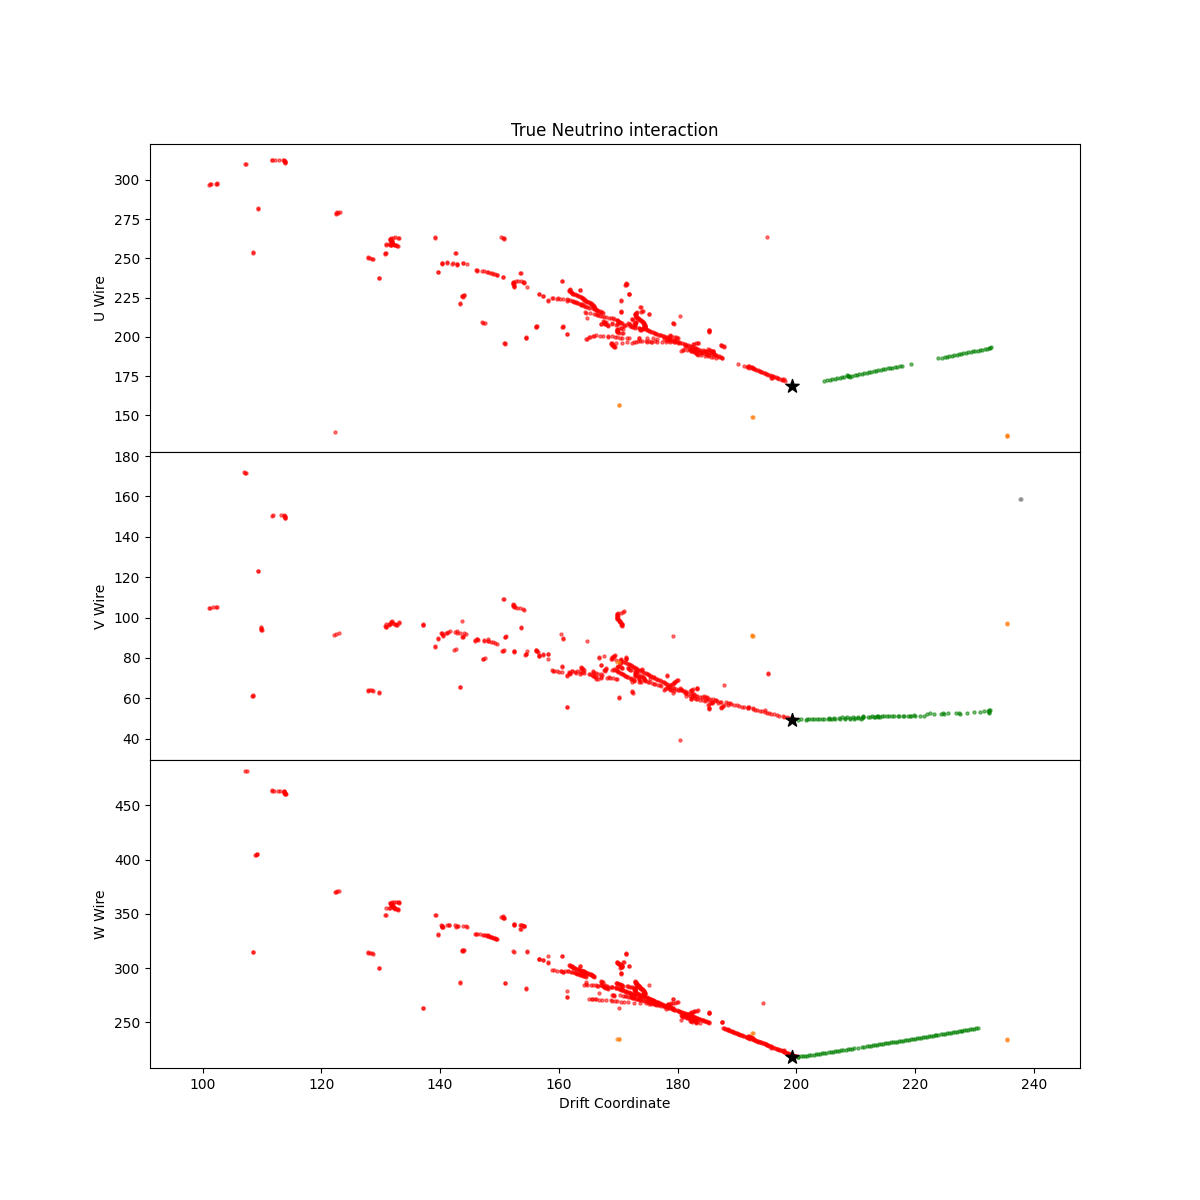

In [10]:
#######################################################################
# TRUE NEUTRINO INTERACTION HITS - USER DOESN'T NEED TO ADD ANYTHING
#######################################################################

plt.subplots(nrows = 3, ncols = 1, gridspec_kw = {'wspace': 0, 'hspace': 0}, figsize=(12, 12))              

#############################
# U view (first induction)
#############################

ax = plt.subplot(3, 1, 1)
ax.set_title("True Neutrino interaction")

other_mask = np.zeros(allUHits_drift_truth.shape, dtype=bool)

for pdg in [13, 11, 2212, 211, 22] :
    plt.scatter(allUHits_drift_truth[allUHits_owner_truth == pdg], allUHits_wire_truth[allUHits_owner_truth == pdg], color = pdgColours_graph.get(pdg), s = 5.0, alpha = 0.5)
    other_mask = np.logical_or(other_mask, allUHits_owner_truth == pdg)
    
other_mask = np.logical_not(other_mask)
plt.scatter(allUHits_drift_truth[other_mask], allUHits_wire_truth[other_mask], color = 'tab:gray', s = 5.0, alpha = 0.5)
plt.scatter(trueNuVertexX_event, uTrueNuVertex_wire_event, color = 'black', s = 100.0, marker='*')

plt.xlim([driftMin_truth - buffer, driftMax_truth + buffer])
plt.ylim([wireMinU_truth - buffer, wireMaxU_truth + buffer])
    
plt.ylabel("U Wire")
plt.gca().axes.get_xaxis().set_visible(False)
    
#############################
# V view (second induction)
#############################

plt.subplot(3, 1, 2)


other_mask = np.zeros(allVHits_drift_truth.shape, dtype=bool)

for pdg in [13, 11, 2212, 211, 22] :
    plt.scatter(allVHits_drift_truth[allVHits_owner_truth == pdg], allVHits_wire_truth[allVHits_owner_truth == pdg], color = pdgColours_graph.get(pdg), s = 5.0, alpha = 0.5)
    other_mask = np.logical_or(other_mask, allVHits_owner_truth == pdg)
    
other_mask = np.logical_not(other_mask)
plt.scatter(allVHits_drift_truth[other_mask], allVHits_wire_truth[other_mask], color = 'tab:gray', s = 5.0, alpha = 0.5)
plt.scatter(trueNuVertexX_event, vTrueNuVertex_wire_event, color = 'black', s = 100.0, marker='*')

plt.xlim([driftMin_truth - buffer, driftMax_truth + buffer])
plt.ylim([wireMinV_truth - buffer, wireMaxV_truth + buffer])
    
plt.ylabel("V Wire")
plt.gca().axes.get_xaxis().set_visible(False)

#############################
# W view (collection)
#############################

plt.subplot(3, 1, 3)

other_mask = np.zeros(allWHits_drift_truth.shape, dtype=bool)

for pdg in [13, 11, 2212, 211, 22] :
    plt.scatter(allWHits_drift_truth[allWHits_owner_truth == pdg], allWHits_wire_truth[allWHits_owner_truth == pdg], color = pdgColours_graph.get(pdg), s = 5.0, alpha = 0.5)
    other_mask = np.logical_or(other_mask, allWHits_owner_truth == pdg)
    
other_mask = np.logical_not(other_mask)
plt.scatter(allWHits_drift_truth[other_mask], allWHits_wire_truth[other_mask], color = 'tab:gray', s = 5.0, alpha = 0.5)
plt.scatter(trueNuVertexX_event, wTrueNuVertex_wire_event, color = 'black', s = 100.0, marker='*')
        
plt.xlim([driftMin_truth - buffer, driftMax_truth + buffer])
plt.ylim([wireMinW_truth - buffer, wireMaxW_truth + buffer])
    
plt.gca().axes.set_title("")
plt.ylabel("W Wire")
plt.xlabel("Drift Coordinate")
plt.show()

<div class="alert alert-block alert-info" style="font-size: 18px;">
    The Pandora slicing isn't perfect, and the flash-matching isn't perfect. So your neutrino interaction <b><i>may</i></b> have been broken up into multiple slices, or the flash-matching <b><i>may</i></b> have failed to identify the neutrino slice. The following visualisations are intended to show you the reconstructed output in all slices that contain true neutrino interactions. Perhaps you might be able to adapt your analyser to reclaim these failures? 
    <ul>
        <li> Choose the iSlice of the slice you wish to view. iSlice ranges from 0 to the number of saved slices (you were told this in an earlier print output). </li>
        <li> You were also earlier told the iSlice of the true neutrino, the flash-matched and Pandora chosen slices. </li>
        <li> <b><i>HEADS UP:</i></b> earlier I mentioned how we have a cosmic-ray and neutrino reconstruction chain. In my analyser I have saved the reconstruction output under the <b><i>neutrino hypothesis</i></b> for each slice. You can access this information from the <b><i>pandoraPatRec</i></b> as I do in the VisualiseSlice_module analyser you cannot obtain it from the <b><i>pandora</i></b> module. 
    </ul>
</div>

<div class="alert alert-block alert-success">
   <p style="font-size: 22px;">
    &#8595 Choose your slice!
   </p>
</div>

In [11]:
####################################################################
# Which slice would you like to view? - USER MUST DO SOMETHING HERE
####################################################################

showFlashMatchSlice = False

if (showFlashMatchSlice) :
    
    if (len(np.where(sliceIDs_event == flashMatchNuSliceID_event)[0]) == 0) :
        raise Exception("Sorry, no flash matched slice...")
        
    iSlice = np.where(sliceIDs_event == flashMatchNuSliceID_event)[0][0]
        
else :
    
    iSlice = 0 # HELLO USER, YOU NEED TO FILL THIS OUT...

<div class="alert alert-block alert-danger">
   <p style="font-size: 22px;">
    &#8593 WAIT! Have you chosen your slice?
   </p>
</div>

In [12]:
##############################################################
# Get our slice variables - USER DOESN'T NEED TO ADD ANYTHING
##############################################################
  
sliceCompleteness_slice = sliceCompleteness_event[iSlice]
slicePurity_slice = slicePurity_event[iSlice]
topologicalScore_slice = topologicalScore_event[iSlice]
recoNuVertexX_slice = recoNuVertexX_event[iSlice]
recoNuVertexY_slice = recoNuVertexY_event[iSlice]
recoNuVertexZ_slice = recoNuVertexZ_event[iSlice]
uRecoNuVertex_wire_slice = uRecoNuVertex_wire_event[iSlice]
vRecoNuVertex_wire_slice = vRecoNuVertex_wire_event[iSlice]
wRecoNuVertex_wire_slice = wRecoNuVertex_wire_event[iSlice]
allUHits_wire_slice = np.array(allUHits_wire_event[iSlice])
allUHits_drift_slice = np.array(allUHits_drift_event[iSlice])
allUHits_owner_slice = np.abs(np.array(allUHits_owner_event[iSlice]))
allVHits_wire_slice = np.array(allVHits_wire_event[iSlice])
allVHits_drift_slice = np.array(allVHits_drift_event[iSlice])
allVHits_owner_slice = np.abs(np.array(allVHits_owner_event[iSlice]))
allWHits_wire_slice = np.array(allWHits_wire_event[iSlice])
allWHits_drift_slice = np.array(allWHits_drift_event[iSlice])
allWHits_owner_slice = np.abs(np.array(allWHits_owner_event[iSlice]))
truePDG_slice = truePDG_event[iSlice]
completeness_slice = completeness_event[iSlice]
purity_slice = purity_event[iSlice]
generation_slice = generation_event[iSlice]
pandoraPFPCode_slice = pandoraPFPCode_event[iSlice]
recoVertexX_slice = recoVertexX_event[iSlice]
recoVertexY_slice = recoVertexY_event[iSlice]
recoVertexZ_slice = recoVertexZ_event[iSlice]
uRecoVertex_wire_slice = uRecoVertex_wire_event[iSlice]
uRecoVertex_drift_slice = uRecoVertex_drift_event[iSlice]
vRecoVertex_wire_slice = vRecoVertex_wire_event[iSlice]
vRecoVertex_drift_slice = vRecoVertex_drift_event[iSlice]
wRecoVertex_wire_slice = wRecoVertex_wire_event[iSlice]
wRecoVertex_drift_slice = wRecoVertex_drift_event[iSlice]
uHits_wire_slice = uHits_wire_event[iSlice]
uHits_drift_slice = uHits_drift_event[iSlice]
vHits_wire_slice = vHits_wire_event[iSlice]
vHits_drift_slice = vHits_drift_event[iSlice]
wHits_wire_slice = wHits_wire_event[iSlice]
wHits_drift_slice = wHits_drift_event[iSlice]
spacePointsX_slice = spacePointsX_event[iSlice]
spacePointsY_slice = spacePointsY_event[iSlice]
spacePointsZ_slice = spacePointsZ_event[iSlice]
nParticles = len(truePDG_slice)
    
# Get in slice hit limits
wireMinU_slice = wireMinV_slice = wireMinW_slice = driftMin_slice = 1e10
wireMaxU_slice = wireMaxV_slice = wireMaxW_slice = driftMax_slice = -1e10

if (allUHits_wire_slice.shape[0] != 0) :
    wireMinU_slice, wireMaxU_slice, driftMin_slice, driftMax_slice = GetLimits(allUHits_wire_slice, allUHits_drift_slice, wireMinU_slice, wireMaxU_slice, driftMin_slice, driftMax_slice)

if (allVHits_wire_slice.shape[0] != 0) :
    wireMinV_slice, wireMaxV_slice, driftMin_slice, driftMax_slice = GetLimits(allVHits_wire_slice, allVHits_drift_slice, wireMinV_slice, wireMaxV_slice, driftMin_slice, driftMax_slice)
    
if (allWHits_wire_slice.shape[0] != 0) :
    wireMinW_slice, wireMaxW_slice, driftMin_slice, driftMax_slice = GetLimits(allWHits_wire_slice, allWHits_drift_slice, wireMinW_slice, wireMaxW_slice, driftMin_slice, driftMax_slice)

# # Get reco slice limits
wireMinU_reco = wireMinV_reco = wireMinW_reco = driftMin_reco = 1e10
wireMaxU_reco = wireMaxV_reco = wireMaxW_reco = driftMax_reco = -1e10

for iParticle in range(nParticles) : 
    
    if (len(uHits_drift_slice[iParticle]) != 0) :
        wireMinU_reco, wireMaxU_reco, driftMin_reco, driftMax_reco = GetLimits(np.array(uHits_wire_slice[iParticle]), np.array(uHits_drift_slice[iParticle]), wireMinU_reco, wireMaxU_reco, driftMin_reco, driftMax_reco)

    if (len(vHits_drift_slice[iParticle]) != 0) :
        wireMinV_reco, wireMaxV_reco, driftMin_reco, driftMax_reco = GetLimits(np.array(vHits_wire_slice[iParticle]), np.array(vHits_drift_slice[iParticle]), wireMinV_reco, wireMaxV_reco, driftMin_reco, driftMax_reco)
        
    if (len(wHits_drift_slice[iParticle]) != 0) :
        wireMinW_reco, wireMaxW_reco, driftMin_reco, driftMax_reco = GetLimits(np.array(wHits_wire_slice[iParticle]), np.array(wHits_drift_slice[iParticle]), wireMinW_reco, wireMaxW_reco, driftMin_reco, driftMax_reco)
        


<div class="alert alert-block alert-info" style="font-size: 18px;">
    <h1><u>What's in the chosen slice?</u></h1>
    <br>
    In the following block, all the recob::Hits in your chosen slice are shown. <b><i>NOTE:</i></b> these are not necessarily the hits that have been reconstructed into particles by Pandora. The idea is to see all the true neutrino interaction hits that exist in your chosen slice, and any contaminates that have been brought into it. From this you should be able to see how the slicing and slice identification tools have performed.
    <br>
    <ul> 
      <li> Again, hits are coloured by the PDG of the particle that contributes most to the hit's charge: muons == blue, electrons == red, protons == green, pions == pink, photons == orange, kaons == brown, anything else == grey. If you want to add another particle, change the <b> pdgColours_graph</b>  dictionary defined earlier. </li>
      <li> The black star represents the true neutrino interaction vertex, it may need to be true->reco corrected </li>
    </ul>
</div>

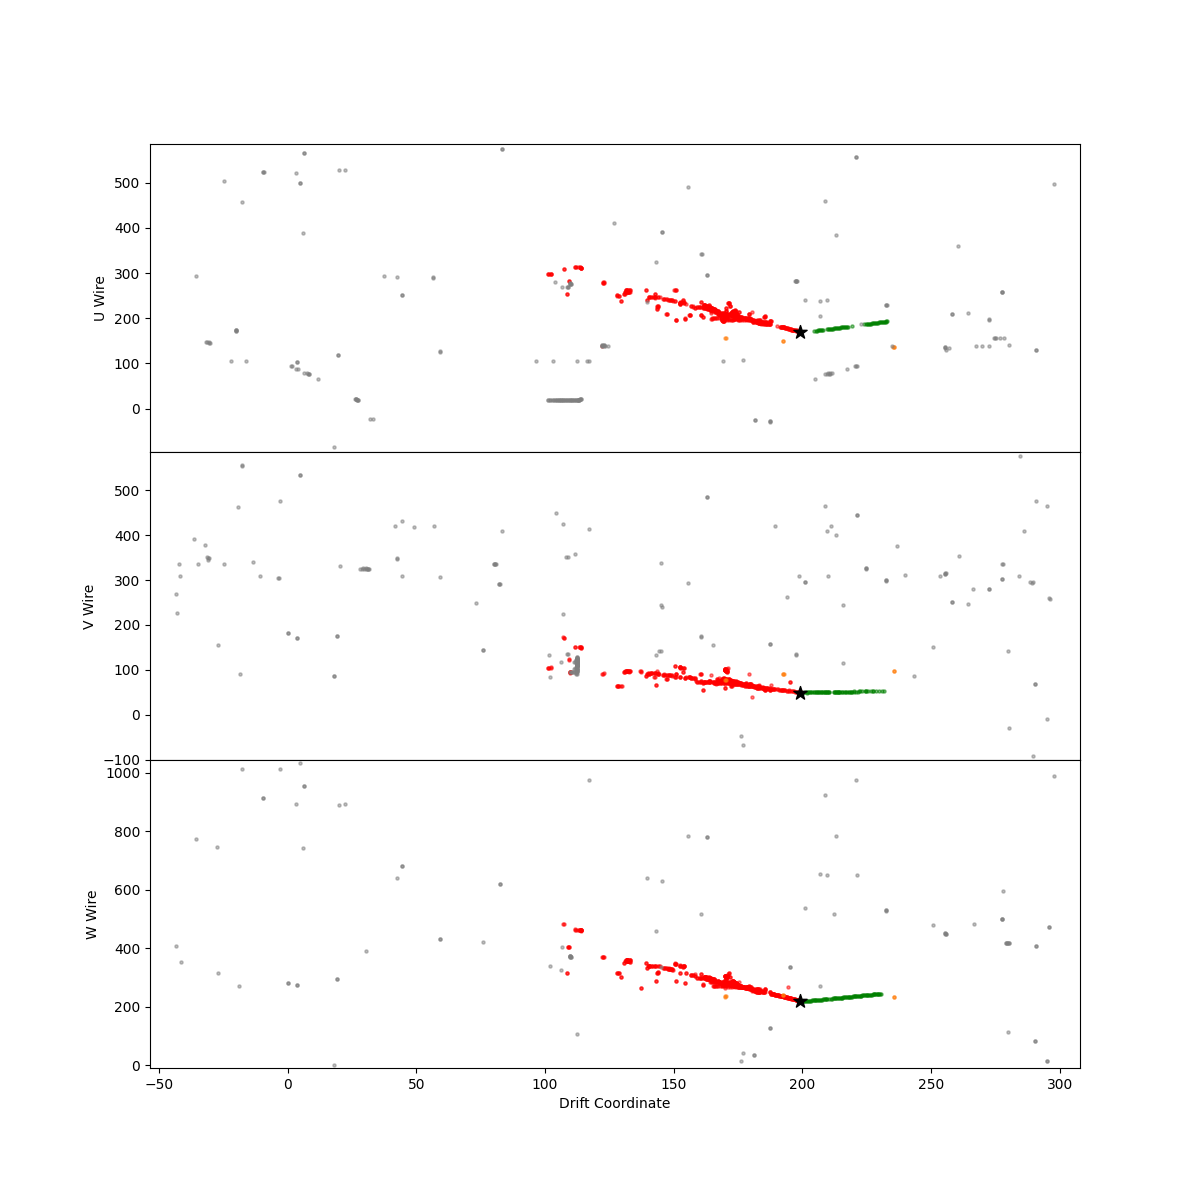

In [13]:
#################################################################
# ALL HITS IN CHOSEN SLICE - USER DOESN'T NEED TO ADD ANYTHING
#################################################################

plt.subplots(nrows = 3, ncols = 1, gridspec_kw = {'wspace': 0, 'hspace': 0}, figsize=(12, 12))              

#############################
# U view (first induction)
#############################

plt.subplot(3, 1, 1)

other_mask = np.zeros(allUHits_drift_slice.shape, dtype=bool)

for pdg in [13, 11, 2212, 211, 22] :
    plt.scatter(allUHits_drift_slice[allUHits_owner_slice == pdg], allUHits_wire_slice[allUHits_owner_slice == pdg], color = pdgColours_graph.get(pdg), s = 5.0, alpha = 0.5)
    other_mask = np.logical_or(other_mask, allUHits_owner_slice == pdg)
    
other_mask = np.logical_not(other_mask)
plt.scatter(allUHits_drift_slice[other_mask], allUHits_wire_slice[other_mask], color = 'tab:gray', s = 5.0, alpha = 0.5)
plt.scatter(trueNuVertexX_event, uTrueNuVertex_wire_event, color = 'black', s = 100.0, marker='*')

plt.xlim([driftMin_slice - buffer, driftMax_slice + buffer])
plt.ylim([wireMinU_slice - buffer, wireMaxU_slice + buffer])
    
plt.ylabel("U Wire")
plt.gca().axes.get_xaxis().set_visible(False)
    
#############################
# V view (second induction)
#############################

plt.subplot(3, 1, 2)

other_mask = np.zeros(allVHits_drift_slice.shape, dtype=bool)

for pdg in [13, 11, 2212, 211, 22] :
    plt.scatter(allVHits_drift_slice[allVHits_owner_slice == pdg], allVHits_wire_slice[allVHits_owner_slice == pdg], color = pdgColours_graph.get(pdg), s = 5.0, alpha = 0.5)
    other_mask = np.logical_or(other_mask, allVHits_owner_slice == pdg)
    
other_mask = np.logical_not(other_mask)
plt.scatter(allVHits_drift_slice[other_mask], allVHits_wire_slice[other_mask], color = 'tab:gray', s = 5.0, alpha = 0.5)
plt.scatter(trueNuVertexX_event, vTrueNuVertex_wire_event, color = 'black', s = 100.0, marker='*')
        
plt.xlim([driftMin_slice - buffer, driftMax_slice + buffer])
plt.ylim([wireMinV_slice - buffer, wireMaxV_slice + buffer])
    
plt.ylabel("V Wire")
plt.gca().axes.get_xaxis().set_visible(False)

#############################
# W view (collection)
#############################

plt.subplot(3, 1, 3)

other_mask = np.zeros(allWHits_drift_slice.shape, dtype=bool)

for pdg in [13, 11, 2212, 211, 22] :
    plt.scatter(allWHits_drift_slice[allWHits_owner_slice == pdg], allWHits_wire_slice[allWHits_owner_slice == pdg], color = pdgColours_graph.get(pdg), s = 5.0, alpha = 0.5)
    other_mask = np.logical_or(other_mask, allWHits_owner_slice == pdg)
    
other_mask = np.logical_not(other_mask)
plt.scatter(allWHits_drift_slice[other_mask], allWHits_wire_slice[other_mask], color = 'tab:gray', s = 5.0, alpha = 0.5)
plt.scatter(trueNuVertexX_event, wTrueNuVertex_wire_event, color = 'black', s = 100.0, marker='*')
        
plt.xlim([driftMin_slice - buffer, driftMax_slice + buffer])
plt.ylim([wireMinW_slice - buffer, wireMaxW_slice + buffer])
    
plt.ylabel("W Wire")
plt.xlabel("Drift Coordinate")
plt.show()


<div class="alert alert-block alert-info" style="font-size: 18px;">
    <h1><u>2D chosen slice reconstruction output</u></h1>
    <br>
    In the following block, the 2D reconstruction of your chosen slice is shown. <b><i>NOTE:</i></b> this is the output from the neutrino interaction optimised reconstruction chain. 
    <br>
    <ul> 
      <li> Hits are coloured by the choice of <b><i>colourMode</i></b> made right at the start. You can chose to colour each PFP by a random colour (colourMode == 0) this is a great choice because you can clearly see who the hits belong to and thus identify any incorrect merges/splitting of particles. You can also colour the PFPs by the PDG of their matched MCParticle (colourMode == 1), whether they have been ID as track or shower-like (colourMode == 2), and their generation i.e. whether they are a child/grand-child/etc.. of the neutrino (colourMode == 3). </li>
      <li> Feel free to keep changing the colour mode, but you'll have to rerun the following cells each time. </li>
      <li> The black star represents the reconstructed neutrino interaction vertex. If you don't see it, it may be that it lies outside the graphs ranges (i think this is very unlikely). But feel free to print its values if you think that's the case. </li>
      <li> The reconstructed vertices of the particles are shown by smaller stars and are coloured by that of the corresponding PFP. </li>
    </ul>
</div>

<div class="alert alert-block alert-success">
    <p style="font-size: 22px;">
     &#8595 How would you like to colour the reconstructed particles?
    </p>
</div>

In [14]:
#####################################################
# Set PFP colour - USER MUST DO SOMETHING HERE
#####################################################

# ATTN USER: You need to set the colour mode!
# 0 - random, 1 - PDG, 2 - track/shower, 3 - generation
colourMode = 0

In [15]:
############################################
# Set PFP colours - USER DOESN'T NEED TO ADD ANYTHING
############################################
particleColours = []

for iParticle in range(nParticles) : 
    
    truePDG_particle = abs(truePDG_slice[iParticle])
    generation_particle = generation_slice[iParticle]
    pandoraPFPCode_particle = pandoraPFPCode_slice[iParticle]

    if (colourMode == 0) :
        particleColours.append((random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)))
    elif (colourMode == 1) :
        particleColours.append(pdgColours_graph.get(abs(truePDG_particle), 'tab:gray'))
    elif (colourMode == 2) :
        particleColours.append(trackShowerColours_graph.get(abs(pandoraPFPCode_particle), 'tab:gray'))
    elif (colourMode == 3) :
        particleColours.append(hierarchyColours_graph.get(generation_particle, 'tab:gray'))

<div class="alert alert-block alert-danger">
   <p style="font-size: 22px;">
    &#8593 WAIT! Have you set the colour mode??
   </p>
</div>

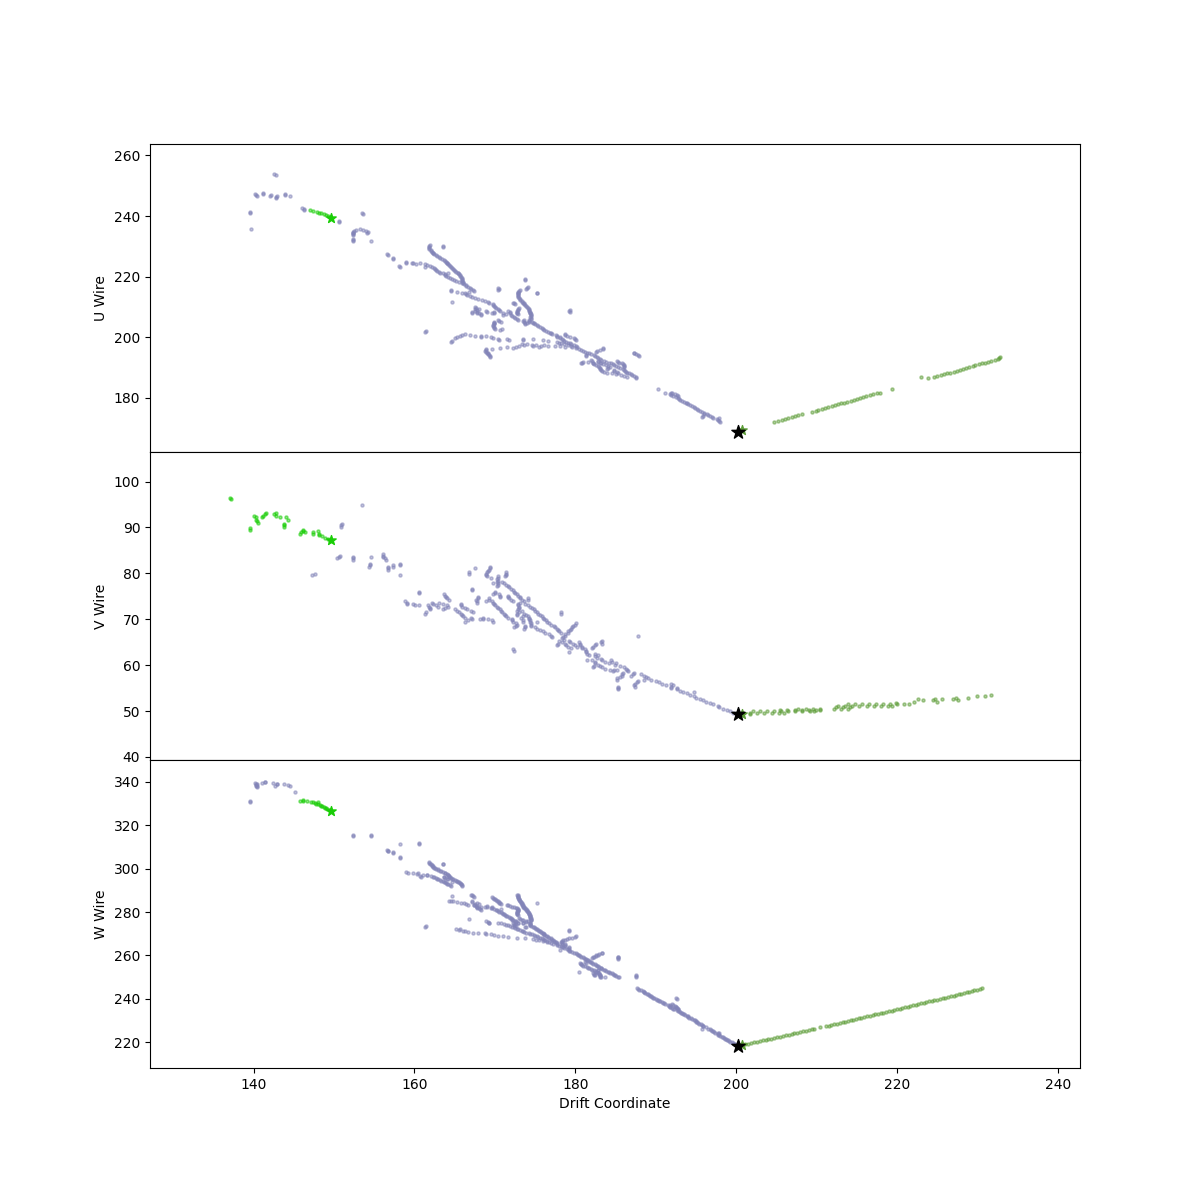

In [16]:
###############################################################################################
# 2D RECONSTRUCTION (UNDER NU HYPOTHESIS) IN CHOSEN SLICE 
###############################################################################################

plt.subplots(nrows = 3, ncols = 1, gridspec_kw = {'wspace': 0, 'hspace': 0}, figsize=(12, 12))              

#############################
# U view (first induction)
#############################

plt.subplot(3, 1, 1)

for iParticle in range(nParticles) : 
    
    uRecoVertex_wire_particle = uRecoVertex_wire_slice[iParticle]
    uRecoVertex_drift_particle = uRecoVertex_drift_slice[iParticle]
    uHits_wire_particle = np.array(uHits_wire_slice[iParticle])
    uHits_drift_particle = np.array(uHits_drift_slice[iParticle])
    
    plt.scatter(uHits_drift_particle, uHits_wire_particle, color = particleColours[iParticle], s = 5.0, alpha = 0.5)
    plt.scatter(uRecoVertex_drift_particle, uRecoVertex_wire_particle, color = particleColours[iParticle], s = 50.0, marker='*')
        
    plt.xlim([driftMin_reco - buffer, driftMax_reco + buffer])
    plt.ylim([wireMinU_reco - buffer, wireMaxU_reco + buffer])
    
    
plt.scatter(recoNuVertexX_slice, uRecoNuVertex_wire_slice, color = 'black', s = 100.0, marker='*')

plt.ylabel("U Wire")
plt.gca().axes.get_xaxis().set_visible(False)
    
#############################
# V view (second induction)
#############################

plt.subplot(3, 1, 2)

for iParticle in range(nParticles) : 
        
    vRecoVertex_wire_particle = vRecoVertex_wire_slice[iParticle]
    vRecoVertex_drift_particle = vRecoVertex_drift_slice[iParticle]
    vHits_wire_particle = np.array(vHits_wire_slice[iParticle])
    vHits_drift_particle = np.array(vHits_drift_slice[iParticle])

    plt.scatter(vHits_drift_particle, vHits_wire_particle, color = particleColours[iParticle], s = 5.0, alpha = 0.5)
    plt.scatter(vRecoVertex_drift_particle, vRecoVertex_wire_particle, color = particleColours[iParticle], s = 50.0, marker='*')
    
    plt.xlim([driftMin_reco - buffer, driftMax_reco + buffer])
    plt.ylim([wireMinV_reco - buffer, wireMaxV_reco + buffer])
    
plt.scatter(recoNuVertexX_slice, vRecoNuVertex_wire_slice, color = 'black', s = 100.0, marker='*')
    
plt.ylabel("V Wire")
plt.gca().axes.get_xaxis().set_visible(False)

#############################
# W view (collection)
#############################

plt.subplot(3, 1, 3)

for iParticle in range(nParticles) : 
    
    wRecoVertex_wire_particle = wRecoVertex_wire_slice[iParticle]
    wRecoVertex_drift_particle = wRecoVertex_drift_slice[iParticle]
    wHits_wire_particle = np.array(wHits_wire_slice[iParticle])
    wHits_drift_particle = np.array(wHits_drift_slice[iParticle])
    
    plt.scatter(wHits_drift_particle, wHits_wire_particle, color = particleColours[iParticle], s = 5.0, alpha = 0.5)
    plt.scatter(wRecoVertex_drift_particle, wRecoVertex_wire_particle, color = particleColours[iParticle], s = 50.0, marker='*')
    
    plt.xlim([driftMin_reco - buffer, driftMax_reco + buffer])
    plt.ylim([wireMinW_reco - buffer, wireMaxW_reco + buffer])
    
plt.scatter(recoNuVertexX_slice, wRecoNuVertex_wire_slice, color = 'black', s = 100.0, marker='*')
    
plt.ylabel("W Wire")


plt.xlabel("Drift Coordinate")
plt.show()

<div class="alert alert-block alert-info" style="font-size: 18px;">
    <h1><u>3D chosen slice reconstruction output</u></h1>
    <br>
    In the following block, the 3D reconstruction of your chosen slice is shown. <b><i>NOTE:</i></b> this is the output from the neutrino interaction optimised reconstruction chain. 
    <br>
    <ul> 
      <li> Hits are coloured by the choice of <b><i>colourMode</i></b> made right at the start. You can chose to colour each PFP by a random colour (colourMode == 0) this is a great choice because you can clearly see who the hits belong to and thus identify any incorrect merges/splitting of particles. You can also colour the PFPs by the PDG of their matched MCParticle (colourMode == 1), whether they have been ID as track or shower-like (colourMode == 2), and their generation i.e. whether they are a child/grand-child/etc.. of the neutrino (colourMode == 3). </li>
      <li> Feel free to keep changing the colour mode, but you'll have to rerun the following cell each time. </li>
      <li> The black star represents the reconstructed neutrino interaction vertex. </li>
      <li> The reconstructed vertices of the particles are shown by smaller stars and are coloured by that of the corresponding PFP. </li>
    </ul>
</div>

-------------------------------------


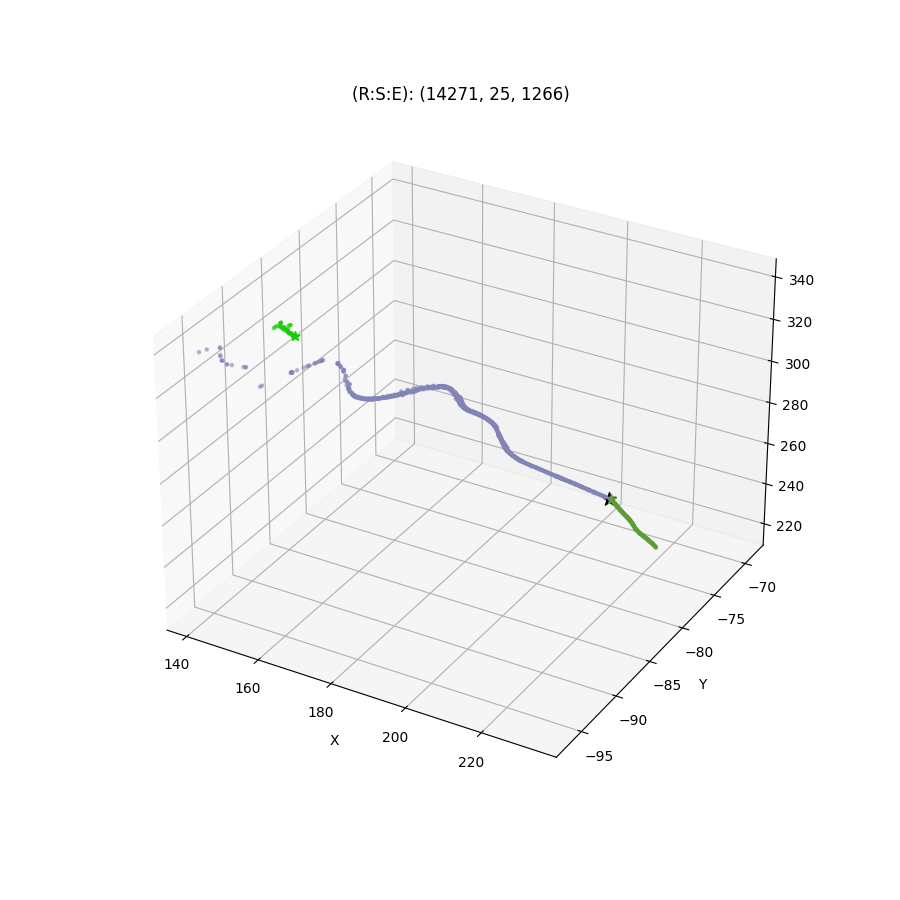

In [17]:
###############################################################################################
# 3D RECONSTRUCTION (UNDER NU HYPOTHESIS) IN CHOSEN SLICE - USER DOESN'T NEED TO ADD ANYTHING
###############################################################################################

fig = plt.figure(figsize=(9,9))
ax = plt.axes(projection='3d')

plt.title('(R:S:E): (' + str(run_event) + ", " + str(subrun_event) + ", " + str(event_event) + ")")
plt.xlabel('X')
plt.ylabel('Y')

for iParticle in range(nParticles) : 
    
    recoVertexX_particle = recoVertexX_slice[iParticle]
    recoVertexY_particle = recoVertexY_slice[iParticle]
    recoVertexZ_particle = recoVertexZ_slice[iParticle]
    spacePointsX_particle = np.array(spacePointsX_slice[iParticle])
    spacePointsY_particle = np.array(spacePointsY_slice[iParticle])
    spacePointsZ_particle = np.array(spacePointsZ_slice[iParticle])
    
    if (spacePointsX_particle.shape[0] == 0) :
        continue
    
    ax.scatter(spacePointsX_particle, spacePointsY_particle, spacePointsZ_particle, color = particleColours[iParticle], s = 5.0, alpha = 0.5)
    ax.scatter(recoVertexX_particle, recoVertexY_particle, recoVertexZ_particle, color = particleColours[iParticle], s = 50.0, marker='*')


print('-------------------------------------')

ax.scatter(recoNuVertexX_slice, recoNuVertexY_slice, recoNuVertexZ_slice, color = "black", s = 100.0, marker='*')
plt.show()

#### plot only reco.. 